<a href="https://colab.research.google.com/github/milosavljeviciva/domaci/blob/main/sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

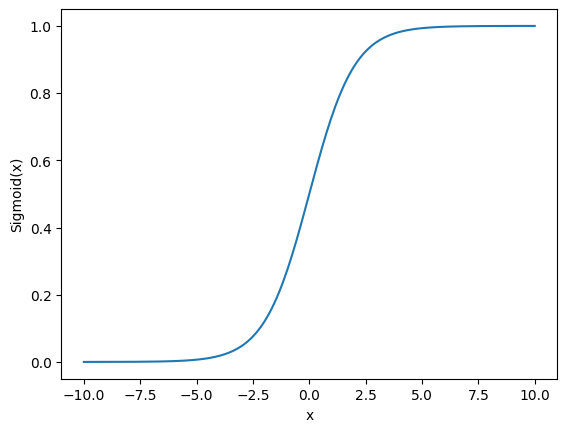

In [4]:
#implementiranje sigmoid funkcije koristeci numpy
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Primer upotrebe
x = np.linspace(-10, 10, 200)
z = sigmoid(x)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.show()

In [5]:
#Sada ćemo kreirati neuronsku mrežu koristeći PyTorch. Pretpostavićemo da imamo jedan skriveni sloj sa 10 neurona:
import torch
import torch.nn as nn
import torch.optim as optim

# Kreiranje modela
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=1, out_features=10)  # Ulazni sloj -> Skriveni sloj
        self.fc2 = nn.Linear(in_features=10, out_features=1)  # Skriveni sloj -> Izlazni sloj

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicijalizacija modela
model = NeuralNetwork()

# Definisanje gubitka i optimizatora
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Treniranje modela (primer)
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[0.0], [0.1], [0.2], [0.3]])

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Testiranje modela
x_test = torch.tensor([[5.0]])
predicted_output = model(x_test)
print(f"Predicted output for x=5: {predicted_output.item()}")

Predicted output for x=5: 0.3319946825504303
